# SIGNAL PROCESSING TP2 - M2 AI
## To Do: IIR Delay effect

- Benedictus Kent Rachmat
- Jacobo Ruiz Ocampo

---

## IMPORT

In [1]:
import numpy as np
import IPython.display as ipd
from scipy.signal import freqz
from scipy import signal
import matplotlib.pyplot as plt
import scipy.io.wavfile as wav

## PLAY THE AUDIO

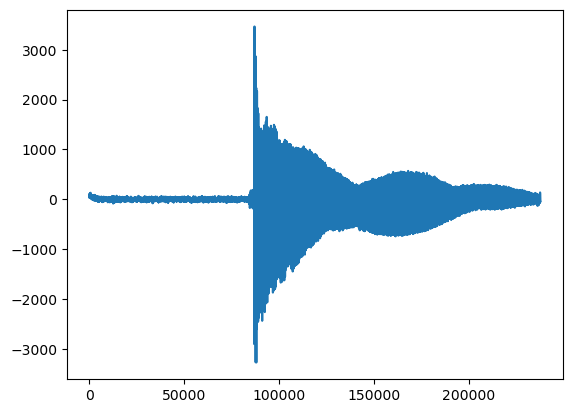

In [2]:
file_name = "string_e.wav"
sr, y = wav.read(file_name)
plt.plot(y)
plt.show()

## Determine the impulse response of the filter for D=1


Given the IIR filter equation:
$$
s[t] = a \cdot e[t] + \beta \cdot s[t - D]
$$

with parameters $ a = 0.5 $, $ \beta = 0.5 $, and $ D = 1 $. With:

$$e[t] = 
\begin{cases} 
1 & \text{if } t = 0 \\
0 & \text{otherwise}
\end{cases}$$


At $ t = 0 $, the impulse $ e[0] $ is 1, and $ s[-1] $ is 0. Thus, the response $ s[0] $ is purely due to the scaling factor $ a $, making it $ s[0] = 0.5 $. From here we can determine the subsequent responses for $t>0$ such as: 

- $t=1, s[1] = 0.5 * s[0] = 0.5 *0.5 = 0.25$
- $t=2, s[2] = 0.5 * s[1] = 0.5 *0.25 = 0.125$
- and so on.. 

However, due to the recursive nature of the filter and the fact that $ \beta = 0.5 $ (halving the value at each step), the decay is exponential. Since the decay is very rapid, the values after a few steps are so small that they appear to be nearly aligned with the x-axis.

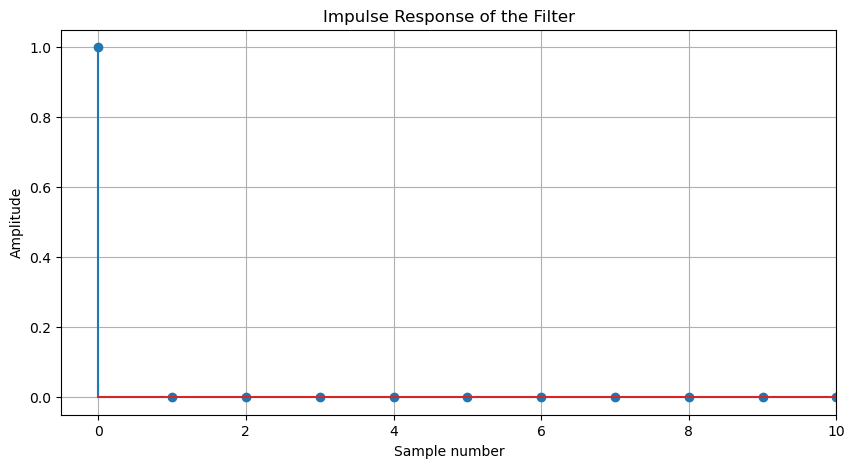

In [3]:
s_iir = np.zeros_like(y)
impulse = np.zeros_like(y)
impulse[0] = 1

a = 1
D = 1
beta = 0.5

# Apply the IIR delay effect 
for t in range(len(impulse)):
    s_iir[t] = a * impulse[t] + beta * s_iir[t - D]

# Plotting
plt.figure(figsize=(10, 5))
plt.stem(s_iir)

plt.title('Impulse Response of the Filter')
plt.xlabel('Sample number')
plt.ylabel('Amplitude')
plt.xlim(-0.5,10)
plt.grid(True)
plt.show()


In [4]:
s_iir[:10]

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int16)

## Provide the Frequency response of the filter

### Implementation of IIR Delay Effect via the Z-Transform with D=1.

Our goal with this transformation is to obtain the coefficients of the impulse response in order to use the lfilter function from scipy.

Given the delay effect defined as:

$ s[t] = \alpha e[t] + \beta s[t-1] $

Transforming to the z-domain yields:

$ S(z) = \alpha E(z) + \beta z^{-1}S(z) $

$ S(z) = \frac{\alpha}{1-\beta z^{-1}}E(z) $

Given the z-domain transfer function:

$ H(z) = \frac{\alpha}{1 - \beta z^{-1}} $

The general representation of an IIR filter in the z-domain is:

$ H(z) = \frac{B(z)}{A(z)} = \frac{b_0 + b_1 z^{-1} + b_2 z^{-2} + \ldots + b_N z^{-N}}{1 + a_1 z^{-1} + a_2 z^{-2} + \ldots + a_M z^{-M}} $

Comparing this with the transfer function $ H(z)$ , we see that:

- The numerator coefficients $ b $ are represented in a vector form as $ [ \alpha, 0, 0, \ldots ] $, since we only have a constant term $ \alpha $ in the numerator.
- The denominator coefficients $ a $ are represented in a vector form as $ [ 1, -\beta, 0, 0, \ldots ] $, since we have a $ 1 $ as the constant term and $ -\beta z^{-1} $ as the next term in the denominator.

So, the coefficient vectors for D=1 are:

$ a = [1, -\beta] $
$ b = [\alpha,0] $


### Impulse response for D=1

In [11]:
# Filter parameters
alpha = 0.5
beta = 0.5
D = 1

# Define the coefficients as previously stated
b = [alpha,0]
a = [1,-beta]

# Impulse response of filter
ztrans_filter = signal.lfilter(b, a, y)

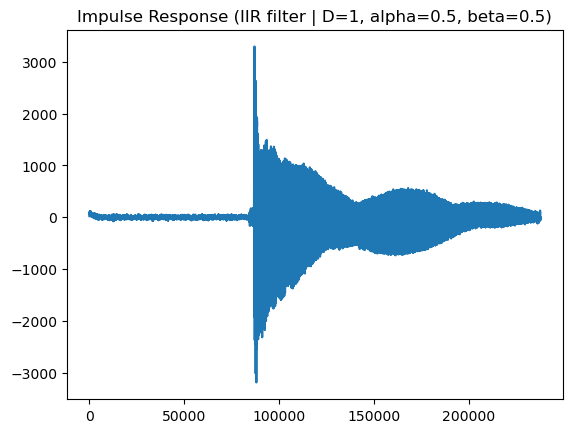

In [12]:
# plot the signal response
plt.plot(ztrans_filter)
plt.title(f'Impulse Response (IIR filter | D={D}, alpha={alpha}, beta={beta})')
plt.show()
plt.show()

### Frequency response for D=1

As for the FIR, we use the freqz function from scipy.signal to compute the frequency response.

In [13]:
w, h = signal.freqz(b, a)

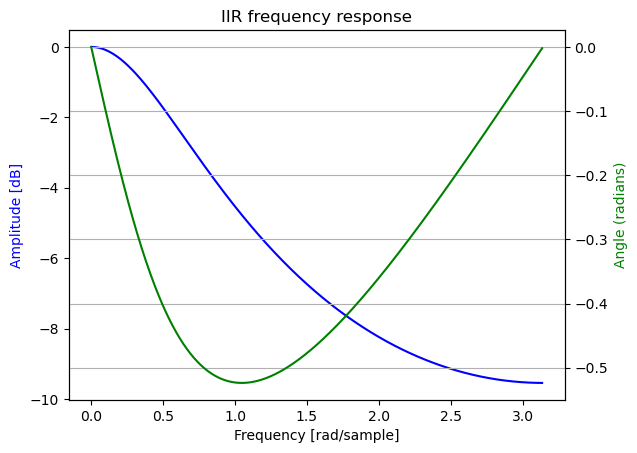

In [15]:
fig, ax1 = plt.subplots()
ax1.set_title('IIR frequency response')

ax1.plot(w, 20 * np.log10(abs(h)), 'b')
ax1.set_ylabel('Amplitude [dB]', color='b')
ax1.set_xlabel('Frequency [rad/sample]')

ax2 = ax1.twinx()
angles = np.unwrap(np.angle(h))
ax2.plot(w, angles, 'g')
ax2.set_ylabel('Angle (radians)', color='g')
ax2.grid(True)
ax2.axis('tight')
plt.show()

## Implement the delay effect in the time domain

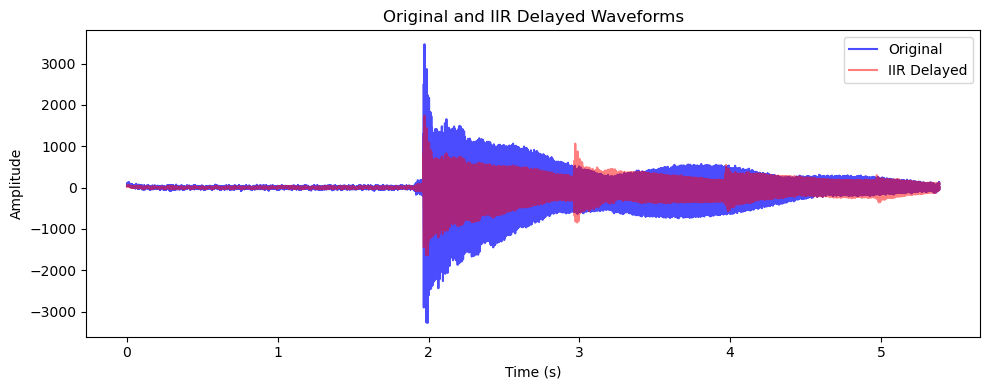

In [7]:
a = 0.5
D = sr
s_iir = np.zeros_like(y)
beta = 0.5

# Apply the IIR delay effect 
for t in range(len(y)):
    s_iir[t] = a * y[t] + beta * s_iir[t - D]

# Plot the original and IIR delayed waveforms
plt.figure(figsize=(10, 4))
 
plt.plot(np.linspace(0, len(y) / sr, len(y)), y, label='Original', color='b', alpha=0.7)
plt.plot(np.linspace(0, len(s_iir) / sr, len(s_iir)), s_iir, label='IIR Delayed', color='r', alpha=0.5)

plt.title('Original and IIR Delayed Waveforms')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.tight_layout()
plt.show()

ipd.Audio(s_iir, rate=sr)

## Is this implementation always stable ?

Let's see when the z-transform implementation is stable:

Our IIR FIlter is stable if for the pole p of our filter: 

$$ |p| < 1 $$ 

A pole of our filter is given by comparing the denominator of the z-transform to 0:  
$$ 
1 - \beta z^{-D} = 0 
$$
$$ 
1 = \beta z^{-D} 
$$
$$ 
\frac{\beta}{z^{D}} = 1 
$$
$$ 
z = \sqrt[D]{\beta} 
$$
Particularly the filter is stable for $\beta<1$:

As the pole $p = \sqrt[D]{\beta} <1$ for all D>0.

However if $\beta>1$ the filter is unstable.

## Discuss the parameters

- `a` (Scaling Factor): This determines the gain of the input signal. A value greater than 1 amplifies the signal, and a value between 0 and 1 attenuates it.
- `B` (Attenuation Factor): This determines the attenuation of the delayed signal. A value of 1 means no attenuation, while a value greater than 1 can lead to instability.
- `D` (Time Delay): This determines the delay in time steps

## Compare with the FIR implementation

Infinite Impulse Response (IIR) filters have feedback (recursive) elements, while Finite Impulse Response (FIR) filters do not. Some comparisons:

- `Stability`: IIR filters can become unstable, while FIR filters are always stable.
- `Phase Response`: FIR filters can have a linear phase response, which means the phase delay is constant across frequencies. This is not always the case for IIR filters. So for applications where maintaining the timing relationships between different frequencies is important, we use FIR filters.